# Propósito

- **(Versão 1.0 / Março-2025)**

O objetivo nesse projeto é produzir visualizações abrangentes e confiáveis das ações da Tesla possibilitando assim um acompanhamento dinâmico do movimento de suas ações ao longo do tempo.
Além disso, nesse projeto também é necessário desenvolver e disponibilizar um modelo preditivo utilizando técnicas avançadas como redes neurais LSTM para prever com precisão próximos movimentos de mercado da empresa.

In [1]:
from plots import *
import yfinance as yf
import pandas as pd
import numpy as np
from seaborn import despine, barplot
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, GRU, Dropout, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from joblib import dump

In [2]:
download = yf.download("TSLA", start="2022-01-01", end="2025-04-26", multi_level_index=False)
download

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700
...,...,...,...,...,...
2025-04-21,227.500000,232.210007,222.789993,230.259995,97768000
2025-04-22,237.970001,242.789993,229.850006,230.960007,120858500
2025-04-23,250.740005,259.450012,244.429993,254.860001,150381900


In [3]:
data = pd.DataFrame(download)
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400
2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300
2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800
2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600
2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700


In [4]:
data.tail(10)

,Close,High,Low,Open,Volume
Date,,,,,
2025-04-11,252.309998,257.739990,241.360001,251.839996,128948100
2025-04-14,252.350006,261.799988,245.929993,258.359985,100135200
2025-04-15,254.110001,258.750000,247.539993,249.910004,79594300
2025-04-16,241.550003,251.970001,233.889999,247.610001,112378700
2025-04-17,241.369995,244.339996,237.679993,243.470001,83404800
2025-04-21,227.500000,232.210007,222.789993,230.259995,97768000
2025-04-22,237.970001,242.789993,229.850006,230.960007,120858500
2025-04-23,250.740005,259.450012,244.429993,254.860001,150381900
2025-04-24,259.510010,259.540009,249.199997,250.500000,94464200


In [5]:
data.to_csv("Acoes_Tesla.csv")

In [6]:
print(isinstance(data.columns, pd.MultiIndex))

False


In [7]:
data[data.duplicated()]

,Close,High,Low,Open,Volume
Date,,,,,


In [8]:
data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [9]:
data.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [10]:
data_grafico = data.iloc[501:,:]
data_grafico.head()

,Close,High,Low,Open,Volume
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


## Visualizações

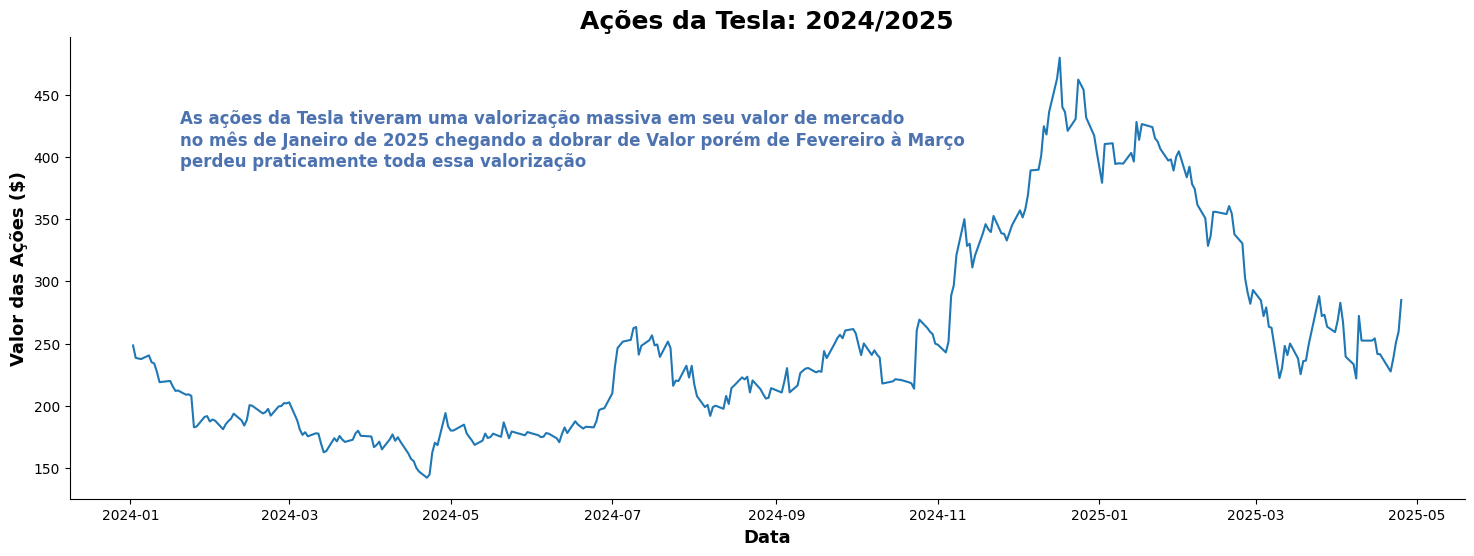

In [11]:
plt.figure(figsize=(18,6))
plt.plot(data_grafico.index, data_grafico["Close"])
plt.title("Ações da Tesla: 2024/2025", fontweight="bold", fontsize=18)
plt.xlabel("Data", fontweight="bold", fontsize=13)
plt.ylabel("Valor das Ações ($)", fontweight="bold", fontsize=13)
plt.annotate(text="As ações da Tesla tiveram uma valorização massiva em seu valor de mercado \
            \nno mês de Janeiro de 2025 chegando a dobrar de Valor porém de Fevereiro à Março \
            \nperdeu praticamente toda essa valorização", xy=(0.7, 0.2), xycoords="figure fraction",
             xytext=(0.1,0.65), fontsize=12, fontweight="bold", color="#4C72B0")
despine(right=True, top=True)
plt.show()

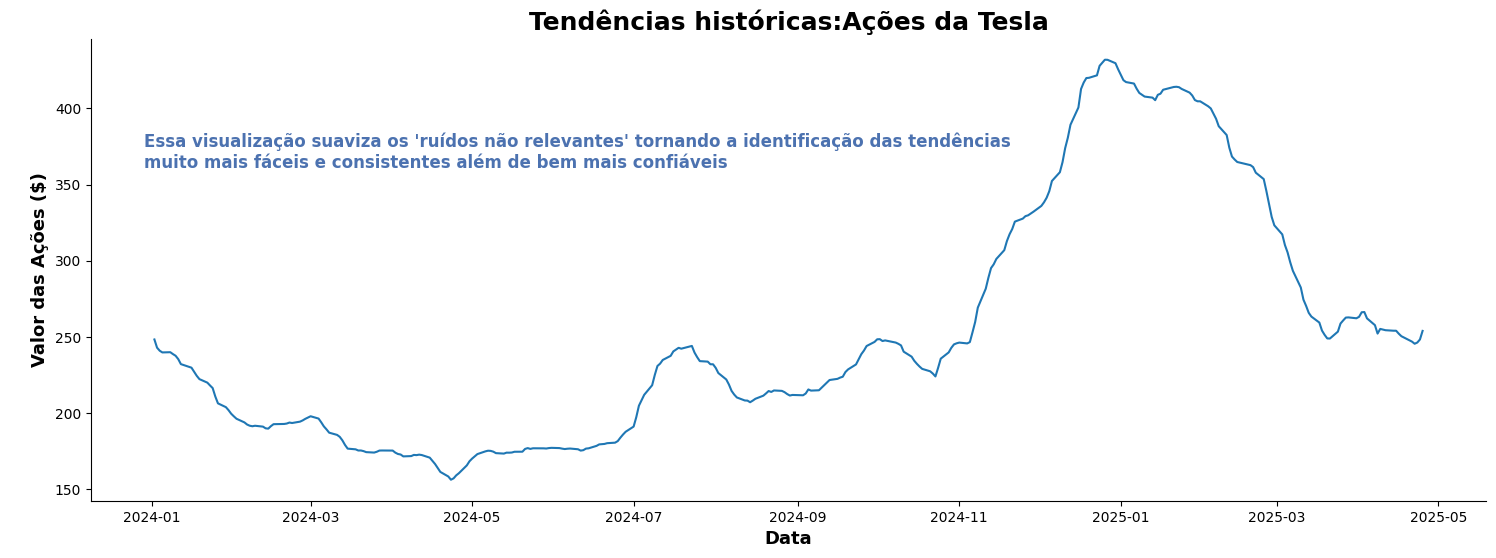

In [12]:
plt.figure(figsize=(18,6))
suavizacao = data_grafico[["Close"]].ewm(span=12, method="single").mean()
plt.plot(suavizacao)
plt.title("Tendências históricas:Ações da Tesla", fontweight="bold", fontsize=18)
plt.xlabel("Data", fontweight="bold", fontsize=13)
plt.ylabel("Valor das Ações ($)", fontweight="bold", fontsize=13)
plt.annotate(text="Essa visualização suaviza os 'ruídos não relevantes' tornando a identificação das tendências\
            \nmuito mais fáceis e consistentes além de bem mais confiáveis", xy=(0.7, 0.2), xycoords="figure fraction",
             xytext=(0.08,0.65), fontsize=12, fontweight="bold", color="#4C72B0")
despine(right=True, top=True)
plt.show()

In [13]:
data_volume = data_grafico.resample("MS")[["Volume"]].mean()
data_volume.head()

,Volume
Date,
2024-01-01,1.116088e+08
2024-02-01,1.009954e+08
2024-03-01,9.494521e+07
2024-04-01,1.126609e+08
2024-05-01,7.582640e+07


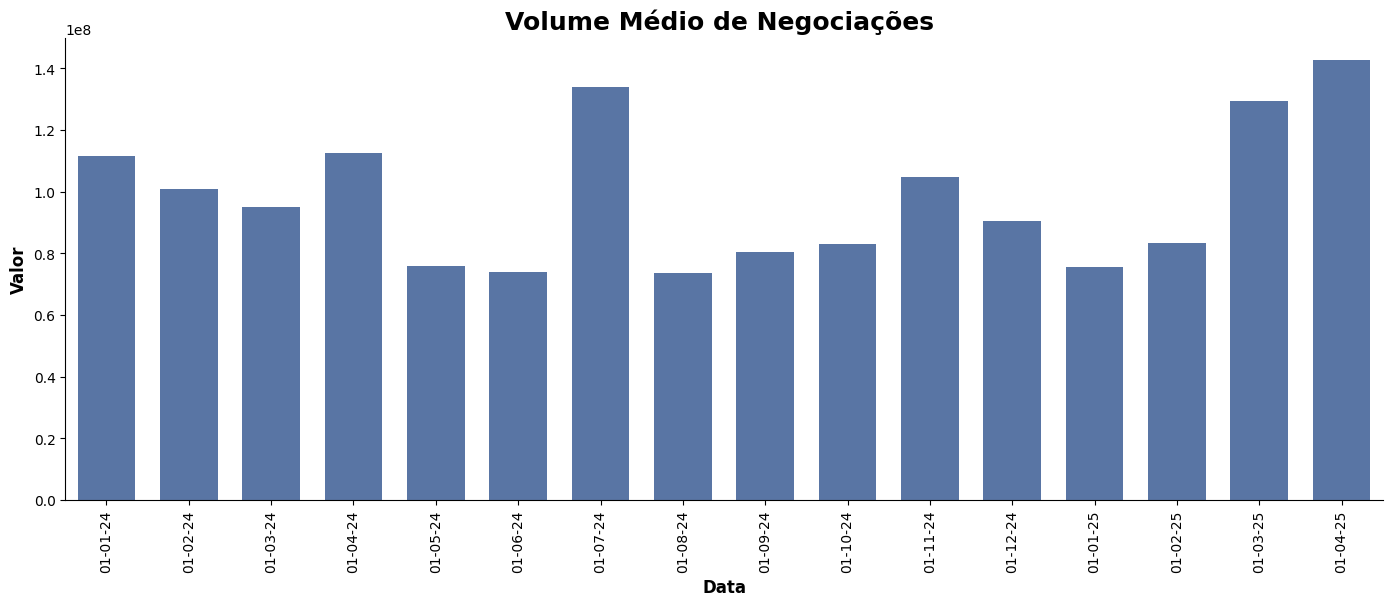

In [14]:
plt.figure(figsize=(17,6))
barplot(data=data_volume, x=data_volume.index.strftime("%d-%m-%y"), y=data_volume["Volume"], width=0.7, color="#4C72B0")
plt.title("Volume Médio de Negociações ", fontsize=18, fontweight="bold")
plt.xlabel("Data", fontsize=12, fontweight="bold")
plt.ylabel("Valor", fontsize=12, fontweight="bold")
plt.xticks(rotation=90)
despine(right=True, top=True)
plt.show()

## Preparação dos dados

In [15]:
data.shape

(831, 5)

In [16]:
ready_data = np.reshape(data["Close"], (-1,1))
ready_data[:10]

array([[399.92666626],
       [383.19665527],
       [362.70666504],
       [354.8999939 ],
       [342.32000732],
       [352.70666504],
       [354.79998779],
       [368.73999023],
       [343.85333252],
       [349.86999512]])

In [17]:
ready_data.shape

(831, 1)

In [18]:
scaler = MinMaxScaler(feature_range=(0.0,1.0))
scaler.fit(ready_data)
ready_data = scaler.transform(ready_data)
ready_data[:20]

array([[0.78498676],
       [0.73998458],
       [0.6848684 ],
       [0.66386917],
       [0.63003017],
       [0.65796932],
       [0.66360017],
       [0.70109748],
       [0.63415468],
       [0.65033894],
       [0.63321319],
       [0.60195648],
       [0.60251239],
       [0.55555557],
       [0.54309234],
       [0.53269136],
       [0.54973642],
       [0.45262179],
       [0.46808876],
       [0.54911771]])

In [19]:
#Função prepara dados vem do arquivo plots
X,y = prepara_dados(ready_data)

In [20]:
X.shape

(801, 30)

In [21]:
data.shape[0]

831

In [22]:
#Separação dos dados de treino, validação, teste e índices
X_train, X_val, X_test, y_train, y_val, y_test, index_test = separa_dados(data, X,y)
X_train.shape

(623, 30)

Dimensões dos dados de Validação e teste após separação

In [23]:
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(index_test.shape)

(83, 30)
(83,)
(95, 30)
(95,)
(95,)


In [24]:
index_test[-1]

Timestamp('2025-04-25 00:00:00')

In [25]:
#Redimensionamento dos dados para formato aceito pela rede neural
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_train.shape

(623, 30, 1)

## Rede Neural LSTM

In [26]:
modelo_lstm = Sequential()
modelo_lstm.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(LSTM(100, return_sequences=True))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(LSTM(100, return_sequences=True))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(LSTM(100, return_sequences=False))
modelo_lstm.add(Dropout(0.2))
modelo_lstm.add(Dense(1))

C:\Users\roni_\anaconda3\envs\ambiente_streamlit\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
modelo_lstm.compile(optimizer="adam", loss="mean_squared_error")
modelo_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
es = EarlyStopping(monitor="val_loss", patience=40, restore_best_weights=True) #EarlyStopping para evitar overfitting
historico = modelo_lstm.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val), callbacks=es)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0446 - val_loss: 0.0253
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0101 - val_loss: 0.0082
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0078 - val_loss: 0.0109
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0059 - val_loss: 0.0128
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0066 - val_loss: 0.0123
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0053 - val_loss: 0.0083
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0043 - val_loss: 0.0090
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0047 - val_loss: 0.0086
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0039 - val_loss: 0.0048
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step

Text(0, 0.5, 'Loss')

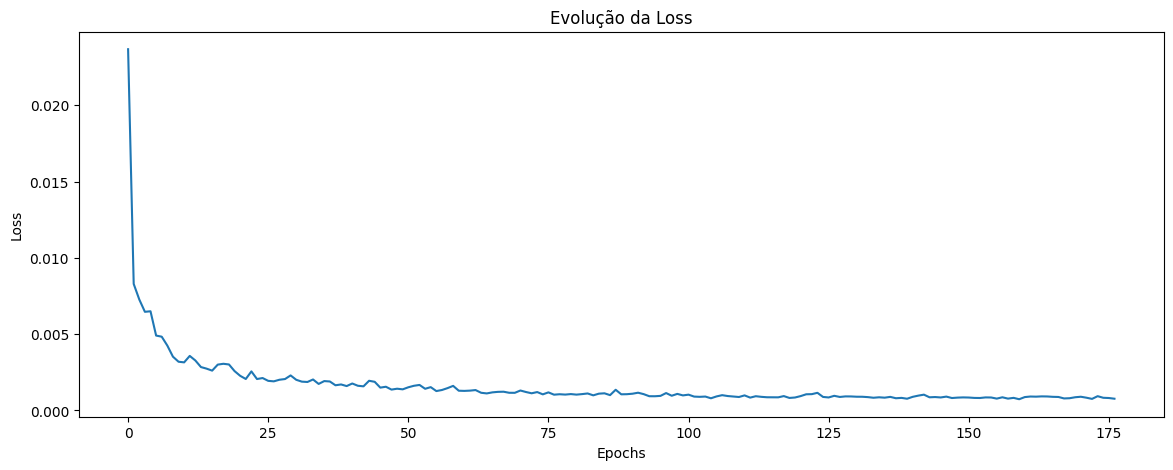

In [29]:
plt.figure(figsize=(14,5))
plt.plot(historico.history["loss"])
plt.title("Evolução da Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [30]:
y_pred_lstm = modelo_lstm.predict(X_test)
y_pred_lstm[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 271ms/step


array([[0.7024187 ],
       [0.7523408 ],
       [0.7471987 ],
       [0.78103673],
       [0.8447218 ],
       [0.8137686 ],
       [0.87718534],
       [0.94176126],
       [0.9687525 ],
       [0.84951687]], dtype=float32)

In [31]:
y_pred_lstm = np.reshape(y_pred_lstm, (-1,1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

y_test = np.reshape(y_test, (-1,1))
y_test = scaler.inverse_transform(y_test)

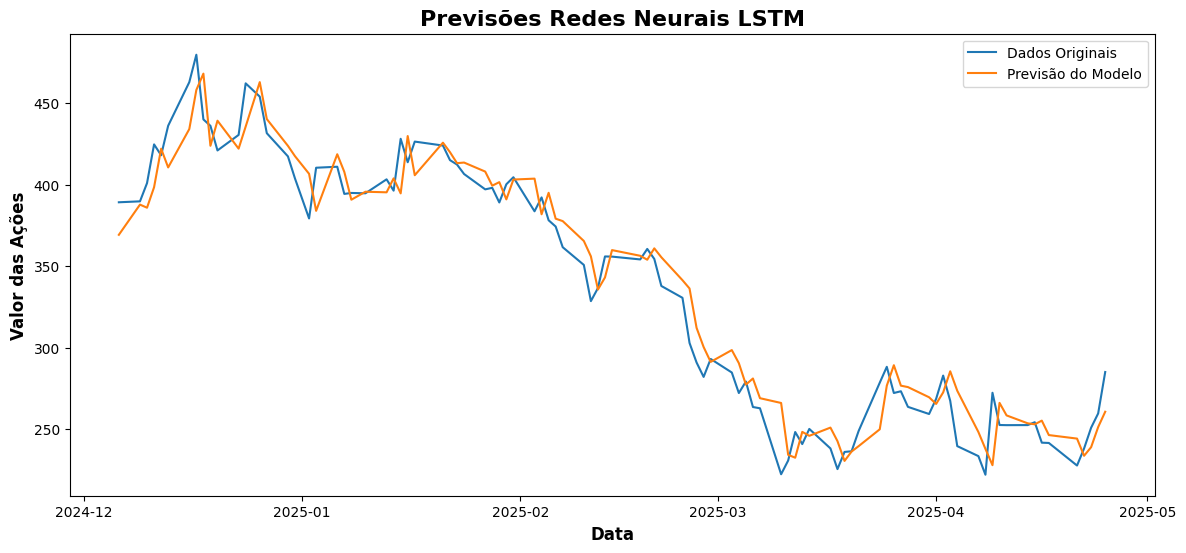

In [32]:
plt.figure(figsize=(14,6))
plt.plot(index_test, y_test, label="Dados Originais")
plt.plot(index_test, y_pred_lstm, label="Previsão do Modelo")
plt.title("Previsões Redes Neurais LSTM", fontsize=16, fontweight="bold")
plt.xlabel("Data", fontsize=12, fontweight="bold")
plt.ylabel("Valor das Ações", fontsize=12, fontweight="bold")
plt.legend()
plt.show()

In [33]:
modelo_lstm.save("Modelo_treinado_lstm.keras")

## Rede Neural CNN - GRU com "Teacher Forcing"

### Abordagem Atualizada

O modelo LSTM mostrou um bom desmepenho com os dados de treinamento porém ao utilizar os próprios dados do modelo para gerar previsões futuras um grande problema foi encontrado.
Esse problema tem à ver com o erro acumulado que é quando o modelo usa suas próprias previsões para gerar previsões futuras, para as quais, obviamente não temos dados de teste.
Por isso foi utilizada uma abordagem alternativa: 1) Redes Neurais Convolucionais que permite a extração de padrões locais e a modelagem de dependências temporais dos dados históricos.
2) Inicialmente, o modelo é treinado utilizando inputs reais para garantir que aprenda os padrões essenciais do comportamento do mercado.
3) Após a fase inicial, o modelo passa a incorporar suas próprias previsões como parte dos dados de entrada, permitindo que o modelo se saia melhor nas previsões quando estiver 'SOZINHO'.

In [34]:
#Estrutura da Rede Neural
# Modelo CNN-LSTM
modelo_cnn_lstm = Sequential()

# Camada CNN
modelo_cnn_lstm.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
modelo_cnn_lstm.add(MaxPooling1D(pool_size=3))
modelo_cnn_lstm.add(Dropout(0.2))

# Camadas LSTM
modelo_cnn_lstm.add(GRU(200, return_sequences=True))
modelo_cnn_lstm.add(Dropout(0.2))
modelo_cnn_lstm.add(GRU(200, return_sequences=True))
modelo_cnn_lstm.add(Dropout(0.2))
modelo_cnn_lstm.add(GRU(200, return_sequences=False))
modelo_cnn_lstm.add(Dropout(0.2))

# Camada densa final
modelo_cnn_lstm.add(Dense(1))

# Compilando o modelo
modelo_cnn_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Exibindo o resumo do modelo
modelo_cnn_lstm.summary()

C:\Users\roni_\anaconda3\envs\ambiente_streamlit\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 9, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 9, 200)         │       159,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 9, 200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 9, 200)         │       241,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 9, 200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 200)            │       241,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,457 (2.45 MB)

 Trainable params: 642,457 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

Treinamento do Modelo GRU utilizando Redes Neurais Convolucionais para filtrar dados importantes e utilizando as próprias Previsões do Modelo para maior robustez do Modelo em prever dados futuros

In [35]:

# Aqui, o modelo é treinado epochs com dados reais o número de epochs é definido no parâmetro 'teacher_forcing_epochs' 
# Depois epochs com dados iterativamente atualizados é definido no parâmetro 'iterative_epochs'.
modelo_cnn_lstm = treinamento_iterativo(modelo_cnn_lstm, X_train, y_train, teacher_forcing_epochs=250, iterative_epochs=25, batch_size=100)


Iniciando a fase de Teacher Forcing...
Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0521
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0167 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0080
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0076
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0068 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0066 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0057
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0053
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0044
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0050
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0043
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0040
Epoch 13/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0041
Epoch 14/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0035
Epoch 15/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47

In [36]:
y_pred = modelo_cnn_lstm.predict(X_test)
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 


array([[0.6377681 ],
       [0.6489829 ],
       [0.68795025],
       [0.69957393],
       [0.70844847],
       [0.759409  ],
       [0.7713178 ],
       [0.7797285 ],
       [0.84294945],
       [0.87099504]], dtype=float32)

In [37]:
y_pred = np.reshape(y_pred, (-1,1))
y_pred = scaler.inverse_transform(y_pred)

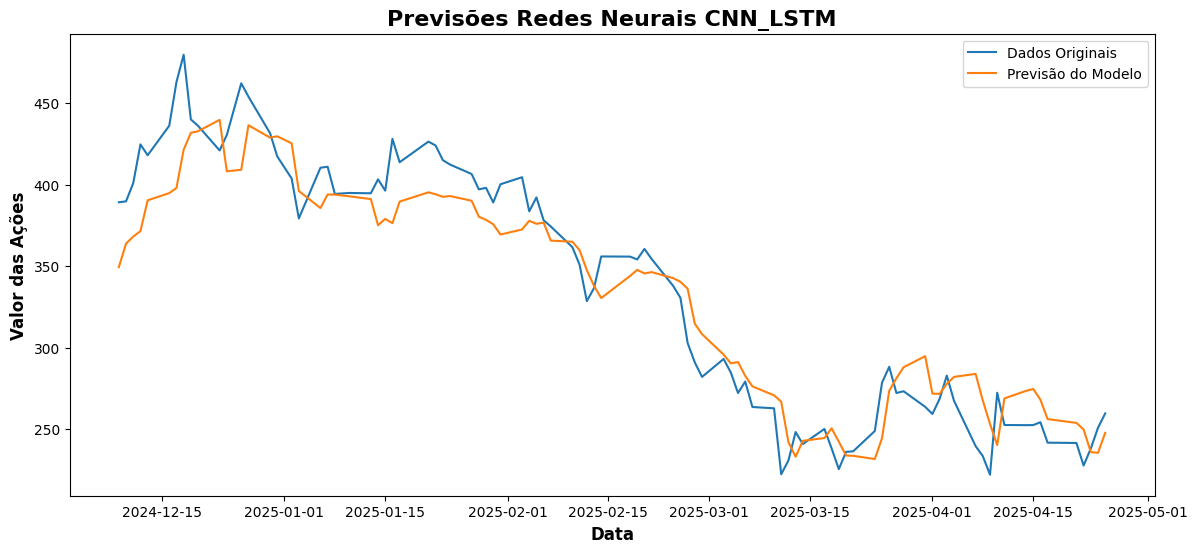

In [38]:
plt.subplots(figsize=(14,6)) #Plotagem do gráfico com pequeno ajuste nos índices para correta visualização
plt.plot(index_test[1:], y_test[:-1], label="Dados Originais")
plt.plot(index_test[1:], y_pred[1:], label="Previsão do Modelo")
plt.title("Previsões Redes Neurais CNN_LSTM", fontsize=16, fontweight="bold")
plt.xlabel("Data", fontsize=12, fontweight="bold")
plt.ylabel("Valor das Ações", fontsize=12, fontweight="bold")
plt.legend()
plt.show()

### Salvamento dos objetos que serão necessários na aplicação web

In [39]:
previsoes_teste = pd.DataFrame({ "Valores Reais": y_test.flatten()[:-1], "Previsões": y_pred.flatten()[1:]}, index=index_test[1:])
previsoes_teste

,Valores Reais,Previsões
Date,,
2024-12-09,389.220001,349.365875
2024-12-10,389.790009,363.852386
2024-12-11,400.989990,368.173584
2024-12-12,424.769989,371.472778
2024-12-13,418.100006,390.417908
...,...,...
2025-04-21,241.369995,253.704117
2025-04-22,227.500000,249.643448
2025-04-23,237.970001,235.804993


In [45]:
previsoes_teste.index[-1]

Timestamp('2025-04-25 00:00:00')

In [40]:
previsoes_teste.to_csv("dados_teste.csv")

In [41]:
modelo_cnn_lstm.save("Modelo_treinado_close.keras")

In [42]:
dump(scaler, "scaler_close.joblib")

['scaler_close.joblib']